TASK 6 - K NEAREST NEIGHBOURS

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


STEP 1 -  Choosing dataset and normalizing the data

In [7]:
irisset = pd.read_csv('iris.csv')
irisset = irisset.drop(columns=['Id']) # Dropping the 'Id' column 
encode = LabelEncoder()
irisset['Species'] = encode.fit_transform(irisset['Species'])

X = irisset.drop('Species', axis=1).values
y = irisset['Species'].values

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [11]:
irisset.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


Experimenting with differnt values of K and evaluating model using accuracy and confusion matrix

In [13]:
k_values = [1, 3, 5, 7, 9]
accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    print(f'Accuracy for k={k}: {acc:.2f}')
    print(f'Confusion Matrix for k={k}:\n{confusion_matrix(y_test, y_pred)}\n')

Accuracy for k=1: 0.97
Confusion Matrix for k=1:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Accuracy for k=3: 1.00
Confusion Matrix for k=3:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy for k=5: 1.00
Confusion Matrix for k=5:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy for k=7: 1.00
Confusion Matrix for k=7:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy for k=9: 1.00
Confusion Matrix for k=9:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



Visualize decision boundaries

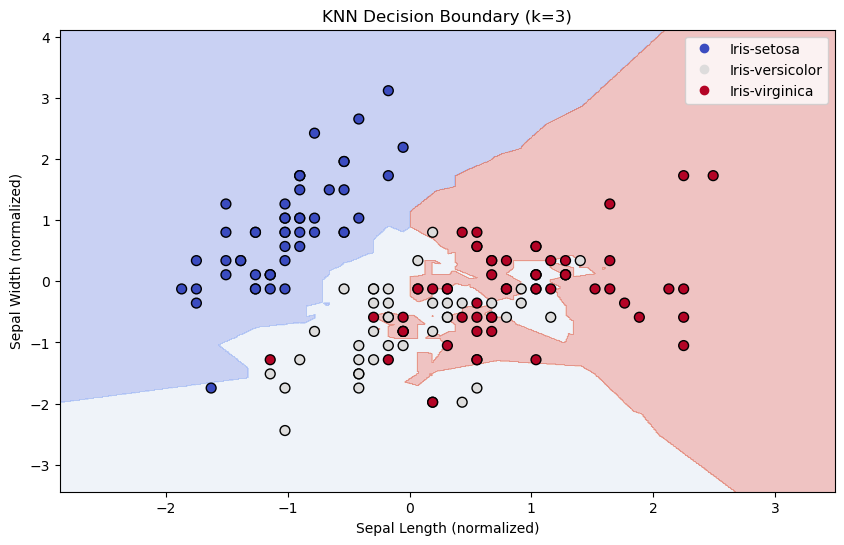

In [21]:
def plot_boundary(X, y, k):
    X_2d = X[:, :2]
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2, y_train2)
    
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.coolwarm)
    
    # Get class names from your actual LabelEncoder
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  # Replace with encoder.classes_ if available
    
    plt.xlabel('Sepal Length (normalized)')
    plt.ylabel('Sepal Width (normalized)')
    plt.title(f'KNN Decision Boundary (k={k})')
    plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
    plt.show()

# Usage (assuming X_normalized and y exist):
plot_boundary(X_normalized, y, k=3)
